## Process Providence Streamflow into P301 Specific Discharge

Q is in daily average l/s initially.

In [1]:
import glob

In [2]:
files = glob.glob('./data/providence_streamflow/*clean.csv')

In [3]:
files

['./data/providence_streamflow/WY2010_gap_filled_Providence_discharge_daily_clean.csv',
 './data/providence_streamflow/WY2009_gap_filled_Providence_discharge_daily_clean.csv',
 './data/providence_streamflow/WY2008_gap_filled_Providence_discharge_daily_clean.csv',
 './data/providence_streamflow/WY2007_gap_filled_Providence_discharge_daily_clean.csv',
 './data/providence_streamflow/WY2006_gap_filled_Providence_discharge_daily_clean.csv',
 './data/providence_streamflow/WY2005_gap_filled_Providence_discharge_daily_clean.csv',
 './data/providence_streamflow/WY2004_gap_filled_Providence_discharge_daily_clean.csv']

In [5]:
header = ['datetime','P301']

In [6]:
data = pd.DataFrame()

for fl in files:
    tmp = pd.read_csv(fl)
    tmp.columns = header
    tmp.index = pd.DatetimeIndex(tmp.datetime)
    data = data.append(tmp)

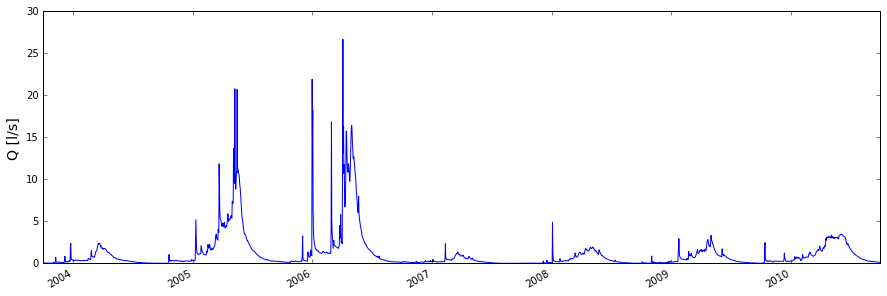

In [14]:
plt.figure(figsize=(15,5))
data.P301.plot()
plt.ylabel('Q [l/s]', fontsize=14)

In [10]:
# convert l/s to CMS
data.P301 *= 0.001

In [11]:
# covert to total daily volume
data.P301 *= (60*60*24) # cms > m3/day

In [12]:
# convert to specific discharge
ba = 992000 # catchment area [m2]
data.P301 /= ba # Q now in m/day

In [13]:
# convert m/day to mm/day
data.P301 *= 1000.

In [16]:
data.sort_index(inplace=True)

In [18]:
data.tail()

,datetime,P301
2010-09-26,9/26/10 0:00,0.137857
2010-09-27,9/27/10 0:00,0.132604
2010-09-28,9/28/10 0:00,0.125255
2010-09-29,9/29/10 0:00,0.124392
2010-09-30,9/30/10 0:00,0.124445


In [20]:
del data['datetime']

In [21]:
data.columns = ['discharge']

In [22]:
data.to_pickle('./data/P301_specific_discharge.pcl')